# 1) Digit recognition


Given the following 'mnist' dataset and the matrices with the test and the training  as below:

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [30]:
f = open("mnist_test_10.csv", 'r')
m_test = f.readlines()
f.close()

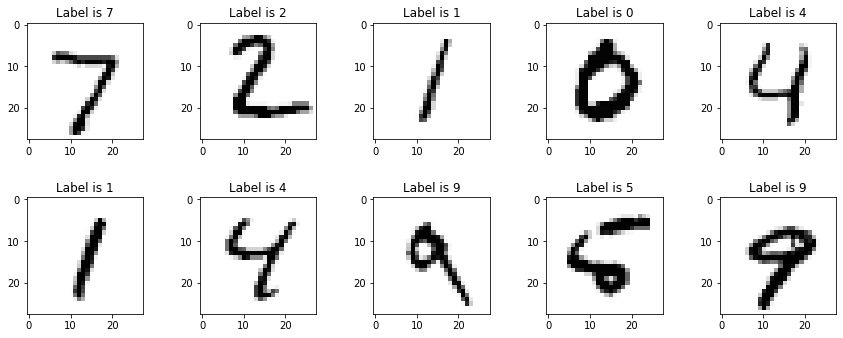

In [31]:
# compute the matrix with the test set
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_test = len(m_test)
row_test= ncol_img*nrow_img
test_array = np.zeros( (row_test,col_test) )
test_lab = np.zeros((row_test,1))
ik=0
for line in m_test:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((ncol_img,nrow_img))
    test_array[:,ik] = imarray.reshape(row_test)
    test_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(5,5,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

In [32]:
f = open("mnist_train_100.csv", 'r')
m_train = f.readlines()
f.close()

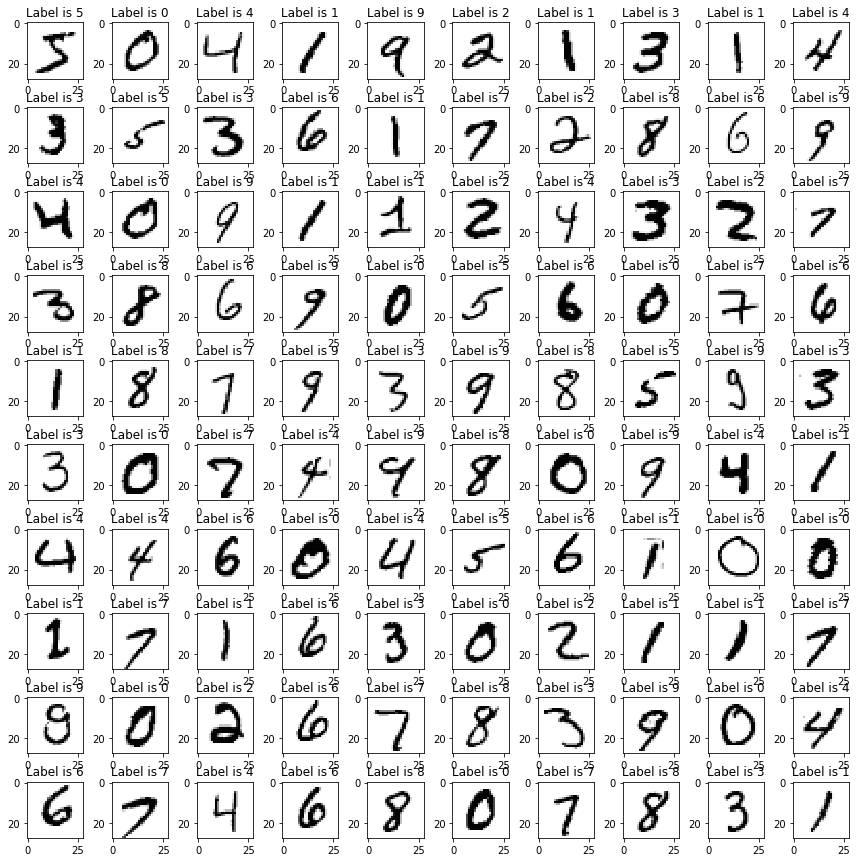

In [33]:
# Compute the matrix with the train set
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_train = len(m_train)
row_train= ncol_img*nrow_img
train_array = np.zeros( (row_train,col_train) )
train_lab = np.zeros((row_train,1))
ik = 0
for line in m_train:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((28,28))
    train_array[:,ik] = imarray.reshape(row_train)
    train_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(10,10,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

- Compute the mean-image of the training images and subtract it from all the other images, denote the obtained matrix by ``AM``.  Since ``AM`` columns have mean different from zero, make sure to center the data and name the new matrix ``AMC``.

Then apply the SVD to ``AMC``  by using ``scipy.linalg.svd`` using ``full_matrices = False``. 

Choose a $k$ value and select a subspace of the range of ``AMC``having dimension $k$ by suitable selecting an orthogonal basis. 

For each digit in the training-set compute its class, that is the mean of the coordinates of the projection in the selected subspace. 

Determine to which class every digit of the test-set belongs to by computing the minimal 2-norm distance.

- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the digit.

- Classify all the digits in the testset and compute the confusion matrix. That is the matrix where, for each digit i, the element of index i,j contains the number of observations known to be in group i and predicted to be in group j. Use ``sklearn.metrics.confusion_matrix`` and compute also  the classification report using ``sklearn.metrics.classification_report``.

- Faccio la media della matrice di training e sottraggo la media

In [34]:
from scipy.linalg import svd

(rows_train, columns_train) = train_array.shape

imgAsum = np.sum(train_array, axis=1)/columns_train
e = np.ones((1, columns_train))
AM = train_array-np.dot(imgAsum.reshape(rows_train, 1), e)
AMC = AM - np.mean(AM, axis=0)

- Calcolo la svd della matrice di training a cui ho sottratto la media

In [35]:
U, S, V = svd(AMC, full_matrices  = False)

k = 16
U = U[:, :k]
S = S[:k]
V = V[:k, :]

- Faccio la classificazione

In [36]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import classification_report, confusion_matrix

# array of predictions
y_pred = []

# compute the man of the matrix U and the test array
U_mean = np.mean(U, axis=1)
test_array_mean = np.mean(test_array, axis=1)

U_mean = U_mean.reshape(-1, 1)
test_array_mean = test_array_mean.reshape(-1, 1)

# classsification
for img in test_array_mean:
    dist = euclidean_distances(test_array_mean, U_mean)
    close_dist = np.argmin(dist)
    
    y_pred.append(train_lab[close_dist])

Classification report

In [37]:
report = classification_report(test_lab, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       775
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         2

    accuracy                           0.99       784
   macro avg       0.14      0.14      0.14       784
weighted avg       0.98      0.99      0.98       784



Confusion matrix

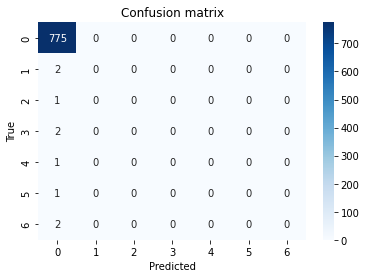

In [38]:
import seaborn as sns

cm = confusion_matrix(test_lab, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

# 2) Minimum of bivariate function

Use the steepest descend method and the Newton method  to approximate  the minimum (${\bf x}^{\star}=(1,1)^{T}$) of the function:
$$f({\bf x})=\frac{1}{2} 0.001(x_1-1)^2+(x_1^2-x_2)^2.$$

Compare the approximations computed by the two methods plotting:

1) the evaluation of the objective function at the vectors generated by the numerical methods;


2) the convergence order $p$ of the numerical scheme can be calculated with 
$$log \left(\frac{\|{\bf x}_{k}-{\bf x}^{\star}\|}{\|{\bf x}_{k+1}-{\bf x}^{\star}\|}\right)/ log \left(\frac{\|{\bf x}_{k-1}-{\bf x}^{\star}\|}{\|{\bf x}_k-{\bf x}^{\star}\|}\right)\approx p $$ for all $k >> 1$.

Use the same starting point and as stopping criterion: 

$$
\| \nabla f({\bf x}_k)\|_2< 10^{-4}
$$


Definisco la funzione a due variabilie, la funzione che mi restituisce il gradiente di f e la funzione che mi restituisce la matrice Hessiana

In [39]:
def f(x, y):
    return 0.5*0.001*(x - 1)**2 + (x*x - y)**2

def grad(f, x, y):
    h = 1e-4
    gradx = (f(x+h, y) - f(x-h, y)) / (2*h)
    grady = (f(x, y+h) - f(x, y-h)) / (2*h)
    return np.array([gradx, grady])

def hessian(f, x, y):
    h = 1e-4
    hessian = np.zeros((2, 2))
    hessian[0, 0] = (f(x+h, y) + f(x-h, y) - 2*f(x, y)) / (h*h)
    hessian[1, 1] = (f(x, y+h) + f(x, y-h) - 2*f(x, y)) / (h*h)
    hessian[0, 1] = (f(x+h, y+h) + f(x-h, y-h) -
                     f(x+h, y-h) - f(x-h, y+h)) / (4*h*h)
    hessian[1, 0] = hessian[0, 1]
    return hessian

Definisco il metodo di Newton

In [40]:
def newton(f, x0, y0, mI ,t=1e-4):
    x = x0
    y = y0
    for i in range(mI):
        gradx, grady = grad(f, x, y)
        H = hessian(f, x, y)
        iH = np.linalg.inv(H)
        x -= iH[0, 0] * gradx + iH[0, 1] * grady
        y -= iH[1, 0] * gradx + iH[1, 1] * grady
        if abs(gradx) < t and abs(grady) < t:
            break
    return np.array([x, y])

Define la steepest descent

In [41]:
def steepest_descent(f, x0, y0, mI, learning_rate=0.01, t=1e-4):
    x = x0
    y = y0
    for i in range(mI):
        gradx, grady = grad(f, x, y)
        x -= learning_rate * gradx
        y -= learning_rate * grady
        if abs(gradx) < t and abs(grady) < t:
            break
    return np.array([x, y])

Eseguo entrambe le funzioni

In [42]:
x = 1
y = 1

steepest_results = steepest_descent(f, x, 100, y)
print(steepest_results)

newton_results = newton(f ,x ,y, 100)
print(newton_results)

[ 4.96 98.02]
[0.99996 0.99992]


Valuto il metodo di Newton e della steepst descent

In [43]:
x_values = [x]
y_values = [y]
z_values = [f(x,y)]
it = [0]

x_values_newton = [x]
y_values_newton = [y]
z_values_newton = [f(x, y)]

for i in range(10, 500, 10):
    # Steepest descent
    sd_x, sd_y = steepest_descent(f, x, y, i)
    n_x, n_y = newton(f, x, y, i)

    x_values.append(sd_x)
    y_values.append(sd_y)
    z_values.append(f(sd_x, sd_y))
    
    x_values_newton.append(n_x)
    y_values_newton.append(n_y)
    z_values_newton.append(f(n_x, n_y))
    
    it.append(i)

Plot dei risultati del metodo di newton

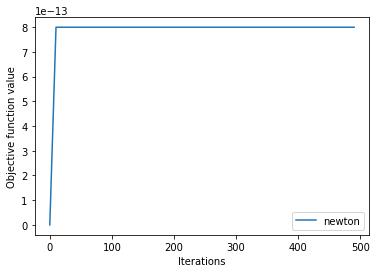

In [44]:
plt.plot(it, z_values_newton, label = "newton")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel('Objective function value')
plt.show()

Plot dei risultati del metodo steepest descent

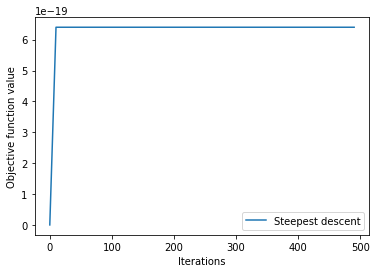

In [45]:
plt.plot(it, z_values, label = "Steepest descent")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel('Objective function value')
plt.show()

2) the convergence order $p$ of the numerical scheme can be calculated with 
$$log \left(\frac{\|{\bf x}_{k}-{\bf x}^{\star}\|}{\|{\bf x}_{k+1}-{\bf x}^{\star}\|}\right)/ log \left(\frac{\|{\bf x}_{k-1}-{\bf x}^{\star}\|}{\|{\bf x}_k-{\bf x}^{\star}\|}\right)\approx p $$ for all $k >> 1$.

Use the same starting point and as stopping criterion: 

$$
\| \nabla f({\bf x}_k)\|_2< 10^{-4}
$$


In [46]:
def newton_2(func, x0, y0, max_iter ,tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        H = hessian(func, x, y)
        inv_H = np.linalg.inv(H)
        x -= inv_H[0, 0] * grad_x + inv_H[0, 1] * grad_y
        y -= inv_H[1, 0] * grad_x + inv_H[1, 1] * grad_y
        if np.linalg.norm(grad_x, ord=None, axis=None, keepdims=False) < tol and np.linalg.norm(grad_y, ord=None, axis=None, keepdims=False) < tol:
            break
    return np.array([x, y])

newton_results_2 = newton_2(f ,x ,y, 100)
print(newton_results_2)

[0.99996 0.99992]


In [47]:
def steepest_descent_2(func, x0, y0, max_iter, learning_rate=0.01, tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        if np.linalg.norm(grad_x, ord=None, axis=None, keepdims=False) < tol and np.linalg.norm(grad_y, ord=None, axis=None, keepdims=False) < tol:
            break
    return np.array([x, y])
    
steepest_results_2 = steepest_descent_2(f, x, y, 100)
print(steepest_results_2)

[1. 1.]


# 3) Google Page Rank

Consider the following web semplification:

<div>
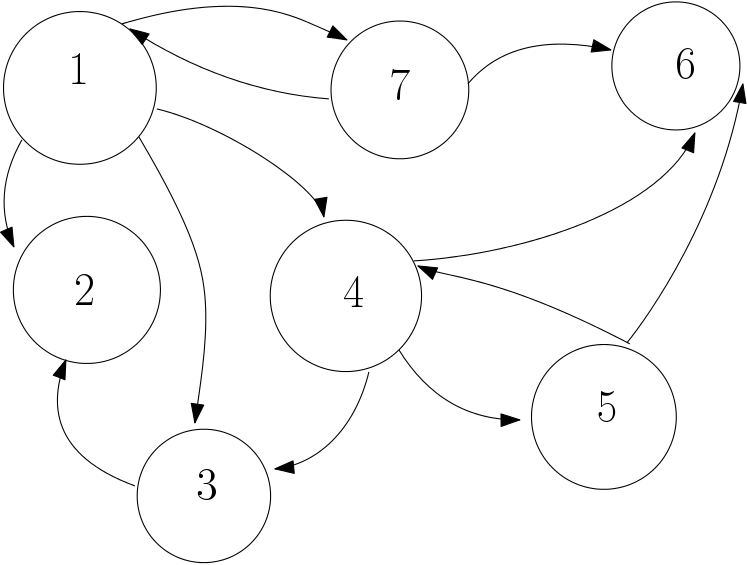
</div>

- Construct the hyperlink matrix $H$ and modify it to handle any dangling node.

In [48]:
H = np.array([
[0, 0, 0, 0, 0, 0, 1/2],
[1/4, 0, 1, 0, 0, 0, 0],
[1/4, 0, 0, 1/3, 0, 0, 0],
[1/4, 0, 0, 0, 1/2, 0, 0],
[0, 0, 0, 1/3, 0, 0, 0],
[0, 0, 0, 1/3, 1/2, 0, 1/2],
[1/4, 0, 0, 0, 0, 0, 0]])

- Construct 3 Google matrices $G_1, G_2, G_3$, by varying the parameter $\alpha = 0.85, 0.90, 0.95$. 

In [49]:
alphas = [0.85, 0.90, 0.95]
n = 7
G1 = alpha_1*H + (1-alphas[0]) /n*np.ones([7,7])
G2 = alpha_2*H + (1-alphas[1])/n*np.ones([7,7])
G3 = alpha_3*H + (1-alphas[2])/ n*np.ones([7,7])
print('\n Google matrix G1 \n', G1)
print('\n Google matrix G2 \n', G2)
print('\n Google matrix G3 \n', G3)


 Google matrix G1 
 [[0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.44642857]
 [0.23392857 0.02142857 0.87142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.23392857 0.02142857 0.02142857 0.3047619  0.02142857 0.02142857
  0.02142857]
 [0.23392857 0.02142857 0.02142857 0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.3047619  0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.3047619  0.44642857 0.02142857
  0.44642857]
 [0.23392857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]]

 Google matrix G2 
 [[0.01428571 0.01428571 0.01428571 0.01428571 0.01428571 0.01428571
  0.46428571]
 [0.23928571 0.01428571 0.91428571 0.01428571 0.01428571 0.01428571
  0.01428571]
 [0.23928571 0.01428571 0.01428571 0.31428571 0.01428571 0.01428571
  0.01428571]
 [0.23928571 0.01428571 0.01428571 0.01428571 0.46428571 0.01428571
  0.01428571]
 [0.01428571 0.01428571 0.01428571 0.31428571 0.0142857

- For every Google matrix compute the ranking of the web pages by using the power method without assuming that the dominant eigenvalue is actually $1$. Hence, also compute the dominant eigenvalue in all the three cases and discuss the obtained results. 

In [52]:
def Page_Rank(u0,A,t,imax):
    i = 1

    y0 = u0/np.linalg.norm(u0)
    
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))  #iterative algorithm
   
    #We use a list also to store the error estimates at every iteration
    e = []
    e.append(1)
    
    while((e[-1]>t) & (i <imax) ):
        temp = zk
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        e.append(np.linalg.norm(temp-zk))
        i = i+1
        
    return zk,i-1,e

z,i,e = Page_Rank(np.array([1,1,1,1,1,1,1]), G1, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])

print("\n")

z,i,r = Page_Rank(np.array([1,1,1,1,1,1,1]), G2, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])

print("\n")

z,i,e = Page_Rank(np.array([1,1,1,1,1,1,1]), G3, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])    

Final computed zk 
 [0.19987356 0.61259115 0.3176043  0.33425329 0.24611449 0.53533758
 0.15819678]
Total numebr of iteration 18
Final accuracy 6.924738322954779e-06


Final computed zk 
 [0.16751462 0.63483396 0.3079813  0.32599447 0.23930429 0.54193237
 0.12977901]
Total numebr of iteration 24
Final accuracy 6.924738322954779e-06


Final computed zk 
 [0.11961827 0.65607923 0.29411041 0.31785516 0.23658339 0.55099342
 0.09029521]
Total numebr of iteration 39
Final accuracy 9.891950150149822e-06


In [51]:
# Function for power method to find the dominant eigenvalue and eigenvector
def power_method(matrix, initial_approx_eigenvector, epsilon=1e-6, tol=500):

#setting previous approximation eigenvector equals to initial approximation
    prev_approx_eigenvector = initial_approx_eigenvector

    for i in range(tol):
        # finding the dot product of matrix and x
        initial_approx_eigenvector = np.dot(matrix, initial_approx_eigenvector)

        # normalizing x
        initial_approx_eigenvector /= np.linalg.norm(initial_approx_eigenvector)

        # finding the dominant eigenvalue
        dominant_eigenvalue = np.dot(np.transpose(initial_approx_eigenvector), np.dot(matrix, initial_approx_eigenvector))
        
        # breaking the loop if the difference between preX and dominant_eigenvector is less than the given tolerance
        if np.linalg.norm(prev_approx_eigenvector - initial_approx_eigenvector) < epsilon:
            break
        prev_approx_eigenvector = initial_approx_eigenvector
        
    # returning the dominant eigenvalue and eigenvector
    return dominant_eigenvalue, initial_approx_eigenvector 

initial_approx_eigenvector = np.array([1, 1, 1, 1, 1, 1, 1])
dominant_eigenvalue, initial_approx_eigenvector = power_method(H, initial_approx_eigenvector)

# printing the dominant eigenvalue and eigenvector
print("The dominant eigenvalue is: ", dominant_eigenvalue)
print("The dominant eigenvector is: ", initial_approx_eigenvector)

The dominant eigenvalue is:  0.3934240362811789
The dominant eigenvector is:  [4.80459938e-33 6.59828879e-01 2.47435830e-01 3.29914440e-01
 2.47435830e-01 5.77350269e-01 4.80459938e-33]
